In [3]:
import mlrose_hiive
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.neural_network import MLPClassifier

In [4]:
# !pip install mlrose_hiive

In [5]:
gtid=903789757

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=gtid)

In [7]:
# y_train

In [8]:
def neural_network(X_train, X_test, y_train, y_test,graph=False,max_iter=300,size=70):
    mlp_clf = MLPClassifier(hidden_layer_sizes=(size, size), max_iter=max_iter)
    begin_time=datetime.now()
    mlp_clf.fit(X_train, y_train)
    end_time=datetime.now()
    # y_pred = mlp_clf.predict(X_test)
    train_score = mlp_clf.score(X_train, y_train)
    test_score = mlp_clf.score(X_test, y_test)
    return train_score,test_score,mlp_clf,end_time-begin_time

In [37]:
ga_nn = mlrose_hiive.NeuralNetwork(
    hidden_nodes=[70],
    activation='relu',
    algorithm='genetic_alg',
    max_iters=500,
    is_classifier =False,
    learning_rate=0.01,
    pop_size=300,
    mutation_prob=0.005,
    max_attempts=15,
    random_state=gtid,
    curve=True,
#     early_stopping =True
)
begin_time=datetime.now()
ga_nn.fit(X_train, y_train)
end_time=datetime.now()
print(end_time-begin_time)

0:05:53.076488


In [22]:
rhc_nn = mlrose_hiive.NeuralNetwork(
    hidden_nodes=[70],
    activation='relu',
    algorithm='random_hill_climb',
    max_iters=50000,
    is_classifier =False,
    learning_rate=0.1,
    max_attempts=150,
    random_state=gtid,
    curve=True,
    restarts=10,
#     early_stopping =True
)
begin_time=datetime.now()
rhc_nn.fit(X_train, y_train)
end_time=datetime.now()
print(end_time-begin_time)

0:21:44.421287


In [23]:
# begin_time=datetime.now()
# end_time=datetime.now()
# print(end_time-begin_time)

In [24]:
sa_nn = mlrose_hiive.NeuralNetwork(
    hidden_nodes=[70],
    activation='relu',
    algorithm='simulated_annealing',
    max_iters=50000,
    is_classifier =False,
    learning_rate=0.1,
    max_attempts=150,
    random_state=gtid,
    curve=True,
#     early_stopping =True
)
begin_time=datetime.now()
sa_nn.fit(X_train, y_train)
end_time=datetime.now()
print(end_time-begin_time)

0:02:23.584889


In [25]:
# plt.figure(1)

In [26]:
# len(rhc_nn.fitness_curve[:,0])

In [27]:
# len(sa_nn.fitness_curve)

In [28]:
train_score_nn,test_score_nn,mlp_clf,train_time = neural_network(X_train, X_test, y_train, y_test,graph=False)

In [42]:
mlps=[]
for i in range(5):
    train_score_nn,test_score_nn,mlp_clf,train_time = neural_network(X_train, X_test, y_train, y_test,graph=False)
    mlps.append(mlp_clf.loss_)

In [44]:
mlps

AttributeError: 'list' object has no attribute 'mean'

<function matplotlib.pyplot.show(close=None, block=None)>

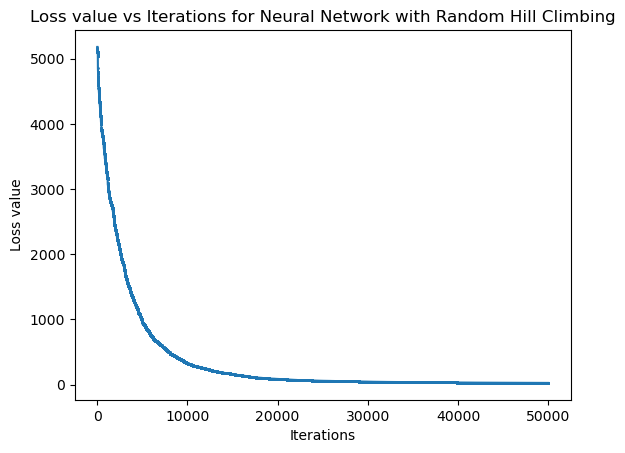

In [29]:

iters=np.arange(1, len(rhc_nn.fitness_curve[:,0])+1,1)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss value vs Iterations for Neural Network with Random Hill Climbing")
plt.plot(iters, rhc_nn.fitness_curve[:,0], marker="o",markersize=1, label="Random Hill Climbing")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

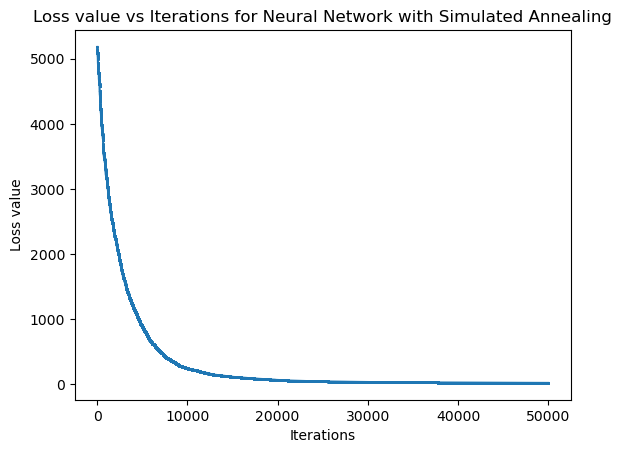

In [30]:

iters=np.arange(1, len(sa_nn.fitness_curve[:,0])+1,1)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss value vs Iterations for Neural Network with Simulated Annealing")
plt.plot(iters, sa_nn.fitness_curve[:,0], marker="o",markersize=1, label="Simulated Annealing")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

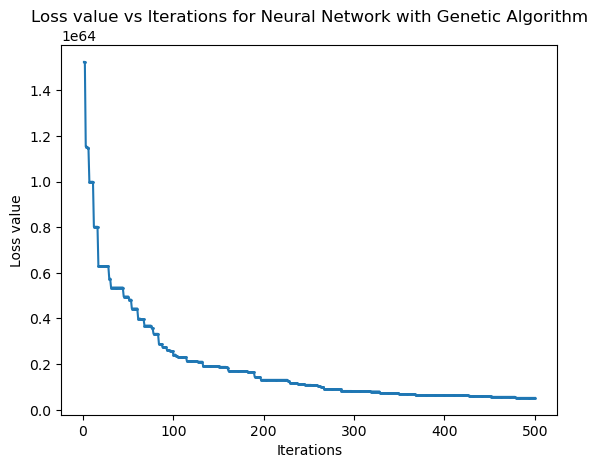

In [31]:

iters=np.arange(1, len(ga_nn.fitness_curve[:,0])+1,1)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss value vs Iterations for Neural Network with Genetic Algorithm")
plt.plot(iters, ga_nn.fitness_curve[:,0], marker="o",markersize=1, label="Genetic Algorithm")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

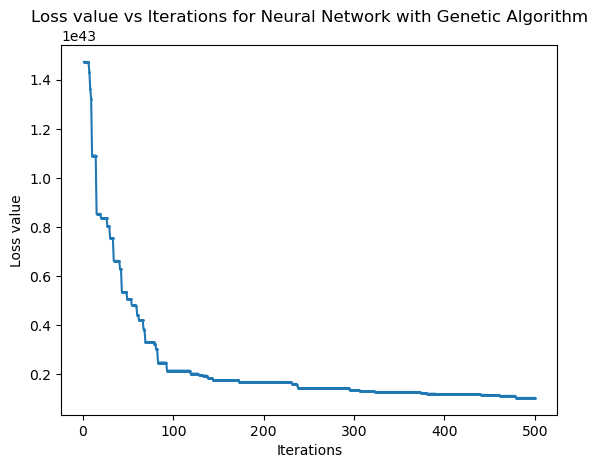

In [38]:

iters=np.arange(1, len(ga_nn.fitness_curve[:,0])+1,1)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss value vs Iterations for Neural Network with Genetic Algorithm")
plt.plot(iters, ga_nn.fitness_curve[:,0], marker="o",markersize=1, label="Genetic Algorithm")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

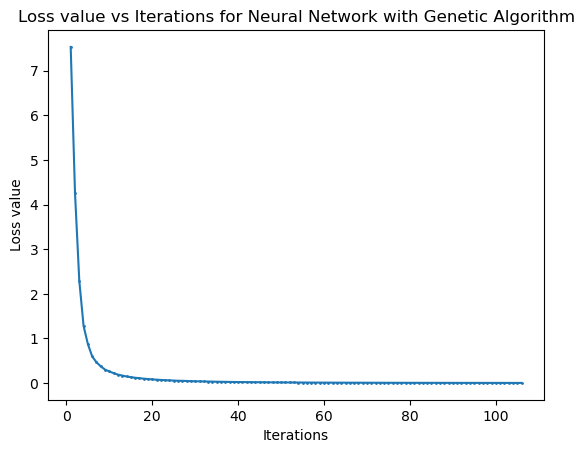

In [39]:

iters=np.arange(1, len(mlp_clf.loss_curve_)+1,1)
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss value vs Iterations for Neural Network with Genetic Algorithm")
plt.plot(iters, mlp_clf.loss_curve_, marker="o",markersize=1, label="Genetic Algorithm")
plt.show


In [ ]:
# rhc_nn.fitness_curve[:,0]

In [ ]:
# sa_nn.fitness_curve

In [ ]:
# ga_nn.fitness_curve

In [33]:
ga_nn.loss

5.149881426492723e+62

In [34]:
sa_nn.loss

19.0965365168829

In [35]:
rhc_nn.loss

21.948625442277073

In [36]:
mlp_clf.loss_

0.0027613269959413517

In [41]:
# ga_nn = mlrose_hiive.NeuralNetwork(
#     hidden_nodes=[70,70],
#     activation='sigmoid',
#     algorithm='genetic_alg',
#     max_iters=100,
#     is_classifier =False,
#     learning_rate=0.001,
#     pop_size=300,
#     mutation_prob=0.005,
#     max_attempts=15,
#     random_state=42,
#     curve=True
# )
# ga_nn.fit(X_train, y_train)

In [42]:
# !pip install mlrose-hiive==1.3.0

In [43]:
# !pip list

In [46]:
# digits = load_digits()
# X = digits.data
# y = digits.target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=gtid)

In [27]:
train_score_nn,test_score_nn,mlp_clf,train_time = neural_network(X_train, X_test, y_train, y_test,graph=False)

In [28]:
mlp_clf.loss_curve_

[5.269315190231481,
 2.24950952505607,
 1.2669922972067282,
 0.7879182636861477,
 0.5605109461949236,
 0.41740479962699295,
 0.3280818566311731,
 0.2707605600715604,
 0.22511267389825365,
 0.19634979105385056,
 0.17111180279888852,
 0.15233396185712636,
 0.1349957142429866,
 0.12217728605129168,
 0.11174260823595873,
 0.10160632981200134,
 0.09286646761904938,
 0.08456307166806708,
 0.07737362658586769,
 0.07048372186445793,
 0.06545902745751754,
 0.06062196870777149,
 0.05657048035902601,
 0.05091353460692587,
 0.04826330260330204,
 0.044652442737998746,
 0.041086346090481604,
 0.03812289276970039,
 0.0347743218413452,
 0.03311913902425103,
 0.0317890852946289,
 0.02875823634159781,
 0.02665503920785821,
 0.02505743877664553,
 0.02334198612809467,
 0.021867455047708668,
 0.020676963034821715,
 0.019667917669387865,
 0.018573599226435696,
 0.01750979608129104,
 0.016673070134475595,
 0.015594603604829496,
 0.014883924217134515,
 0.014166227985604072,
 0.013538618943373734,
 0.012710074

In [58]:
def plot_curves(curves,names,colors):
    for i in range(len(curves)):
        curve=curves[i]
        name=names[i]
        len_x=len(curve)
        x = np.arange(0, len_x)
        plt.plot(x, curve, color=color, label=name)

0.00212465809064553

In [41]:
ga_nn.fitness_curve[:]

array([[1.47203870e+43, 6.03000000e+02],
       [1.47203870e+43, 9.04000000e+02],
       [1.47203870e+43, 1.20500000e+03],
       [1.47203870e+43, 1.50600000e+03],
       [1.47203870e+43, 1.80700000e+03],
       [1.47203870e+43, 2.10800000e+03],
       [1.43025913e+43, 2.41000000e+03],
       [1.36108533e+43, 2.71200000e+03],
       [1.32070273e+43, 3.01400000e+03],
       [1.09099474e+43, 3.31600000e+03],
       [1.09099474e+43, 3.61700000e+03],
       [1.09099474e+43, 3.91800000e+03],
       [1.09099474e+43, 4.21900000e+03],
       [1.09099474e+43, 4.52000000e+03],
       [8.53459110e+42, 4.82200000e+03],
       [8.53459110e+42, 5.12300000e+03],
       [8.53459110e+42, 5.42400000e+03],
       [8.53459110e+42, 5.72500000e+03],
       [8.53459110e+42, 6.02600000e+03],
       [8.36370417e+42, 6.32800000e+03],
       [8.36370417e+42, 6.62900000e+03],
       [8.36370417e+42, 6.93000000e+03],
       [8.36370417e+42, 7.23100000e+03],
       [8.36370417e+42, 7.53200000e+03],
       [8.363704

In [40]:
mlp_clf.loss_

0.0027613269959413517